In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set global visualization parameters
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Room Type Wise LNL.xls'
# Column names based on the report layout
cols = ['Empty', 'Room_Type', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_room = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries loaded and Room Type data imported.")

Libraries loaded and Room Type data imported.


In [3]:
# 1. Drop unnecessary empty columns and rows
df_room = df_room.drop(columns=['Empty']).dropna(subset=['Room_Type'])

# 2. Filter out systemic rows like 'Total' or 'Pay Master' (adjustments)
df_room = df_room[~df_room['Room_Type'].str.contains('Total|Grand Total|Pay Master', case=False, na=False)]

# 3. Convert numeric columns for analysis
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_room[col] = pd.to_numeric(df_room[col], errors='coerce').fillna(0)

# 4. Filter for active room types
df_active = df_room[df_room['Nights'] > 0].copy()

print(f"Cleaned {len(df_active)} room categories for analysis.")
df_active.head()

Cleaned 4 room categories for analysis.


,Room_Type,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
0,Banyan Suite,584.0,27.85,1367.0,3813848.98,27.80,6530.56,2789.94
1,Banyan Suite With Deck,426.0,20.31,1020.0,3063731.16,22.33,7191.86,3003.66
2,Cypress Suite,583.0,27.80,1215.0,3430512.69,25.00,5884.24,2823.47
3,Cypress Suite With Deck,504.0,24.03,1107.0,3098291.40,22.58,6147.40,2798.82


C:\Users\SC\AppData\Local\Temp\ipykernel_12696\4027518892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Room_Type', palette='crest')


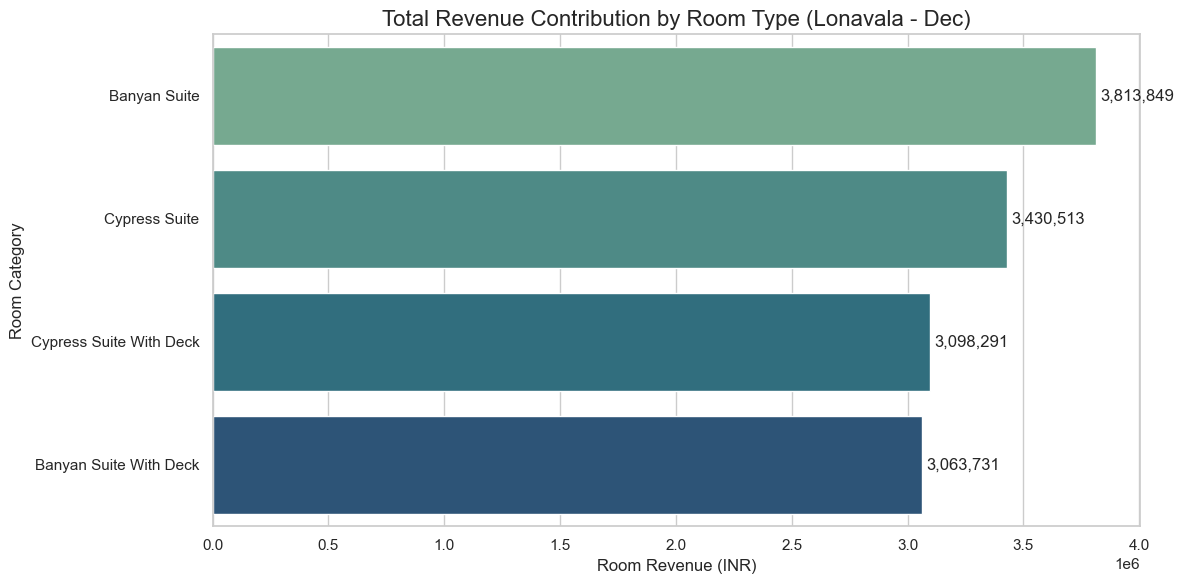

In [4]:
# Sort by Room Revenue
df_rev = df_active.sort_values(by='Room_Revenue', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Room_Type', palette='crest')
plt.title('Total Revenue Contribution by Room Type (Lonavala - Dec)', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Room Category', fontsize=12)

# Adding value labels
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. TOP EARNER: The 'Banyan Suite' is the highest revenue contributor, generating over 3.8M INR.
#### 2. PRODUCT POPULARITY: Both Banyan and Cypress categories show strong revenue, indicating a well-balanced interest across the resort's main suite types.
#### 3. DECK PREMIUM: Suites with Decks ('Banyan Suite With Deck' and 'Cypress Suite With Deck') contribute significantly, proving that guests value outdoor space.

C:\Users\SC\AppData\Local\Temp\ipykernel_12696\3965976215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_nights, x='Nights', y='Room_Type', palette='magma')


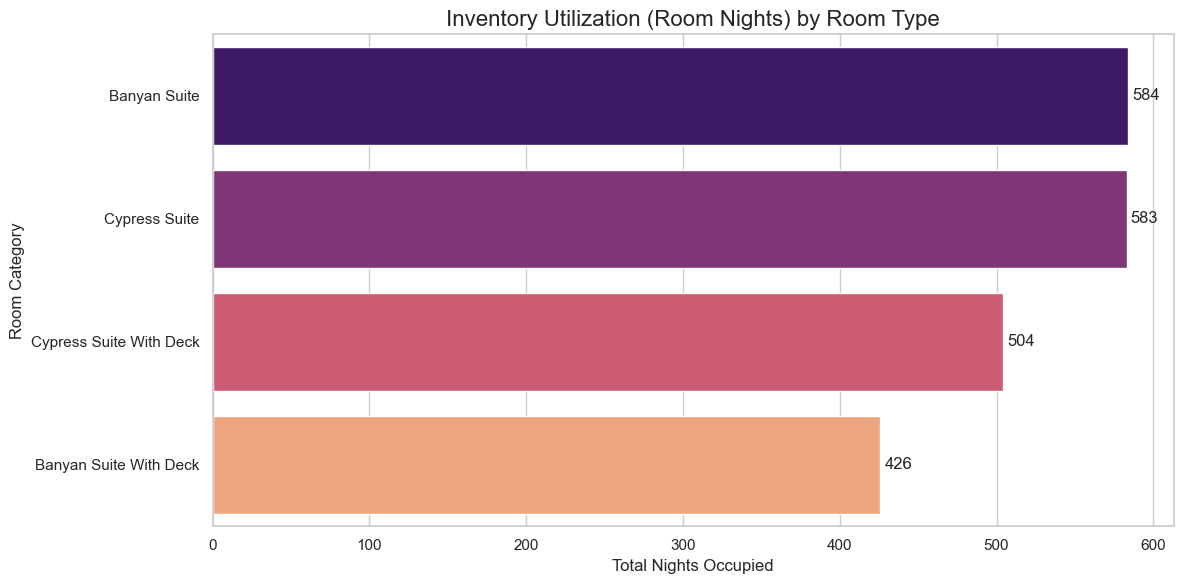

In [5]:
# Sort by Nights to see which rooms stay occupied the most
df_nights = df_active.sort_values(by='Nights', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_nights, x='Nights', y='Room_Type', palette='magma')
plt.title('Inventory Utilization (Room Nights) by Room Type', fontsize=16)
plt.xlabel('Total Nights Occupied', fontsize=12)
plt.ylabel('Room Category', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. HIGH VOLUME: 'Banyan Suite' and 'Cypress Suite' have almost identical night counts (~584 vs 583), suggesting these are your standard high-volume inventory.
#### 2. DECK SUITE VELOCITY: Suites with decks have slightly lower night counts (400-500 range), which may reflect their smaller total inventory count or higher price barrier.
#### 3. BALANCED LOAD: The relatively even distribution of nights across all 4 categories shows that the resort manages inventory effectively.

C:\Users\SC\AppData\Local\Temp\ipykernel_12696\566723194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_arr, x='ARR', y='Room_Type', palette='flare')


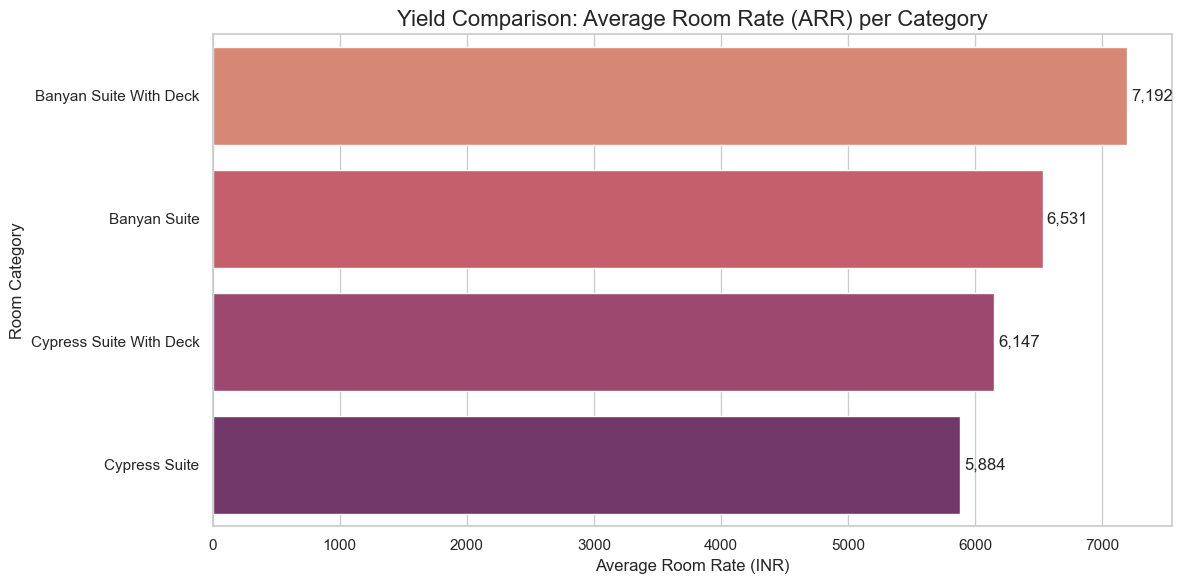

In [6]:
# Sort by ARR to identify the most profitable room categories per night
df_arr = df_active.sort_values(by='ARR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_arr, x='ARR', y='Room_Type', palette='flare')
plt.title('Yield Comparison: Average Room Rate (ARR) per Category', fontsize=16)
plt.xlabel('Average Room Rate (INR)', fontsize=12)
plt.ylabel('Room Category', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. THE DECK PREMIUM: 'Banyan Suite With Deck' commands the highest ARR (7,192 INR), which is ~10% higher than the standard Banyan Suite.
#### 2. CATEGORY DIFFERENTIAL: The 'Banyan' line generally commands a higher rate than the 'Cypress' line, positioning Banyan as the more premium experience.
#### 3. PRICING STRATEGY: There is a clear 300-600 INR premium for a Deck in both categories, which is a successful upselling point.

C:\Users\SC\AppData\Local\Temp\ipykernel_12696\2806131242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_pax, x='Pax_per_Night', y='Room_Type', palette='viridis')


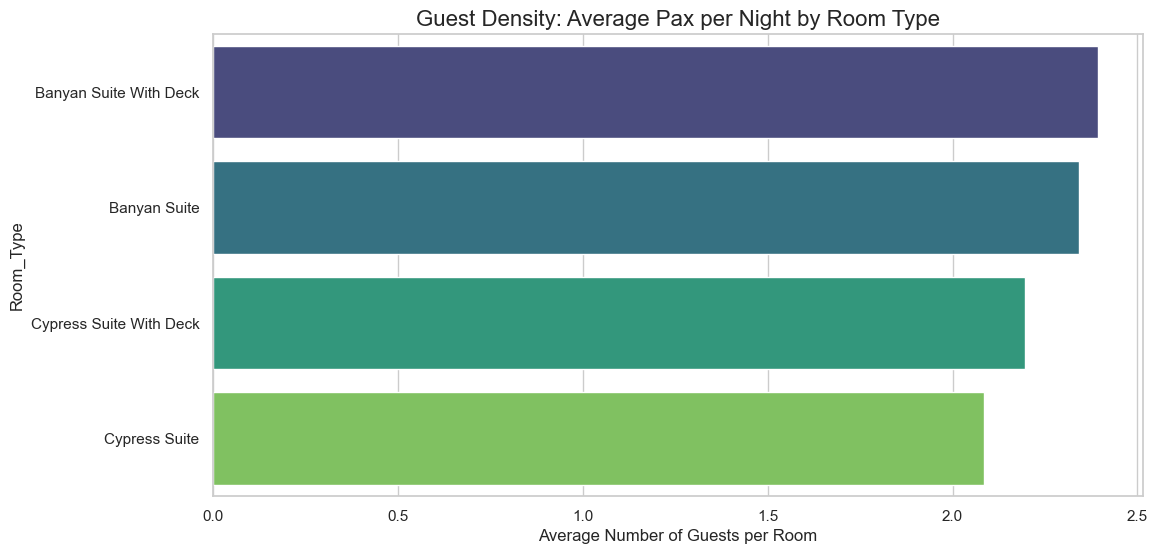

In [7]:
# Calculate Pax per Night
df_active['Pax_per_Night'] = df_active['Pax'] / df_active['Nights']
df_pax = df_active.sort_values(by='Pax_per_Night', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_pax, x='Pax_per_Night', y='Room_Type', palette='viridis')
plt.title('Guest Density: Average Pax per Night by Room Type', fontsize=16)
plt.xlabel('Average Number of Guests per Room', fontsize=12)
plt.show()

#### --- INSIGHTS ---
#### 1. SUITE CAPACITY: All suites hover around 2.1 - 2.4 guests per room, confirming they are primarily used for double occupancy with occasional extra children/adults.
#### 2. BANYAN DENSITY: The 'Banyan Suite' has the highest density (2.34), suggesting it is the preferred choice for small families.

In [8]:
# Create a final summary table
summary = df_active[['Room_Type', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('LNL_Room_Type_Performance_Summary.csv', index=False)

print("Analysis Complete. Summary of Room Category Performance:")
summary.head()

Analysis Complete. Summary of Room Category Performance:


,Room_Type,Nights,Room_Revenue,ARR,Revenue_Pct
0,Banyan Suite,584.0,3813848.98,6530.56,27.80
2,Cypress Suite,583.0,3430512.69,5884.24,25.00
3,Cypress Suite With Deck,504.0,3098291.40,6147.40,22.58
1,Banyan Suite With Deck,426.0,3063731.16,7191.86,22.33
